In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_excel('Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
print(df.isnull().sum())
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


<ipython-input-2-4c2771dd5386>:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [ ]:
df = df.resample('MS').sum()

df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


In [ ]:
df.shape


(48, 1)

In [ ]:
df.columns


Index(['Sales'], dtype='object')

In [ ]:
n = len(df)
#train size
m = int(n*0.8)

train_data = df.iloc[0:m]
test_data = df.iloc[m:n]

print(f"Total df size {len(df)}")
print(f"Total train data size {len(train_data)}")
print(f"Total test data size {len(test_data)}")

Total df size 48
Total train data size 38
Total test data size 10


In [ ]:
train_data.tail()


,Sales
Order Date,
2016-10-01,11872.5770
2016-11-01,31783.6288
2016-12-01,36678.7150
2017-01-01,5964.0320
2017-02-01,6866.3374


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Sales'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
test_predictions = fitted_model.forecast(len(test_data))
test_predictions


,0
2017-03-01,13763.527009
2017-04-01,12828.424876
2017-05-01,13100.634157
2017-06-01,10880.026770
2017-07-01,14485.001836
2017-08-01,10032.360087
2017-09-01,29777.813730
2017-10-01,14468.440315
2017-11-01,30588.479516
2017-12-01,31461.293604


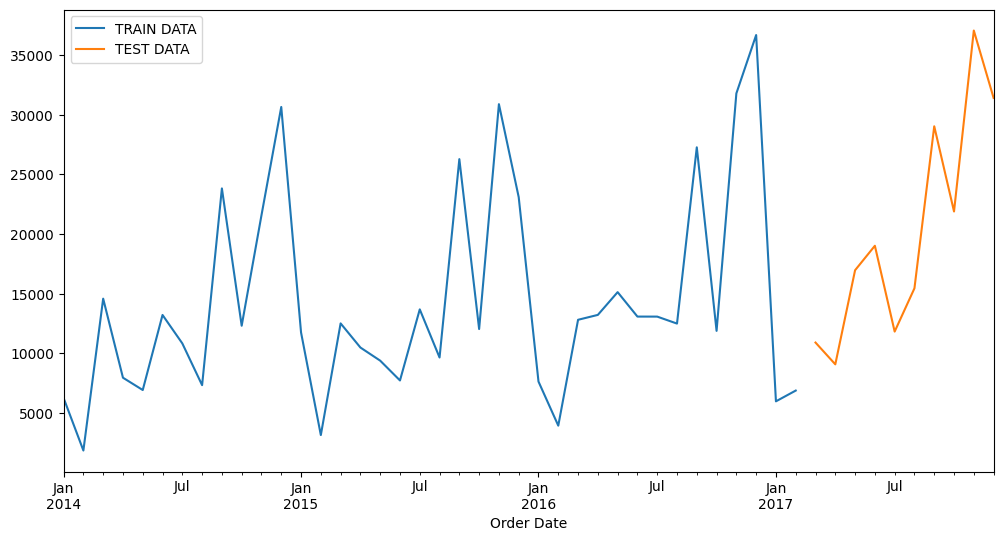

In [ ]:
train_data['Sales'].plot(legend=True, label='TRAIN DATA')
test_data['Sales'].plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)

<Axes: xlabel='Order Date'>

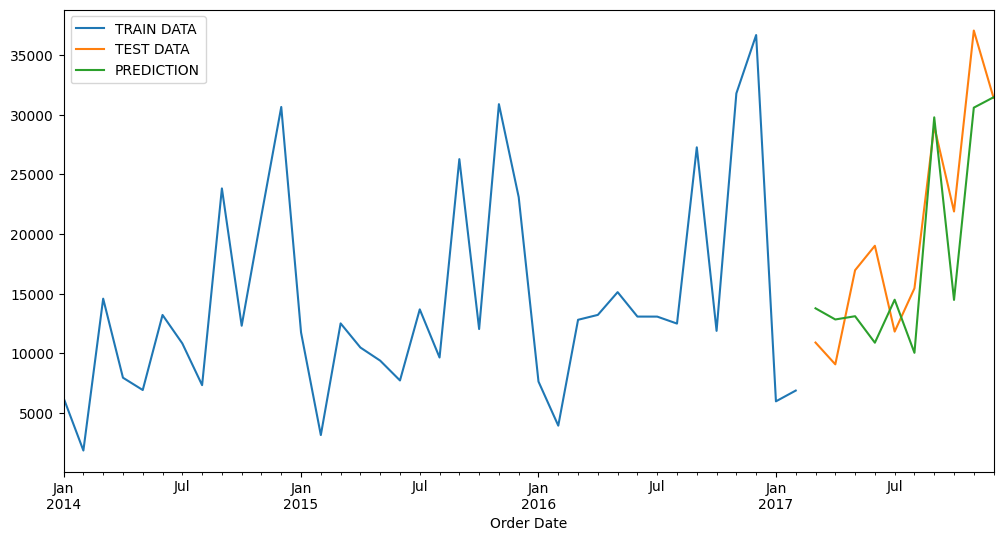

In [ ]:
train_data['Sales'].plot(legend=True, label='TRAIN DATA')
test_data['Sales'].plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
test_predictions.plot(legend=True, label='PREDICTION')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae_error = mean_absolute_error(test_data, test_predictions)

print(f"Mean absolute error of the above model is {mae_error}")

Mean absolute error of the above model is 4138.682460955162


In [ ]:
mse_error = mean_squared_error(test_data, test_predictions)

print(f"Mean squared error of the above model is {mse_error}")

Mean squared error of the above model is 23713961.102707732


In [ ]:
rmse_error = np.sqrt(mean_squared_error(test_data, test_predictions))

print(f"Root mean squared error of the above model is {rmse_error}")

Root mean squared error of the above model is 4869.698255817062


In [ ]:
test_data.describe()


,Sales
count,10.000000
mean,20255.689980
std,9463.329001
min,9065.958100
25%,12720.235000
50%,17983.072450
75%,27242.171550
max,37056.715000


In [ ]:
fitted_model = ExponentialSmoothing(df['Sales'], trend='mul', seasonal='mul', seasonal_periods=12).fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
future_preds = fitted_model.forecast(12)
future_preds

,0
2018-01-01,10145.196758
2018-02-01,5276.646045
2018-03-01,14046.143518
2018-04-01,12638.938600
2018-05-01,15347.806822
2018-06-01,14398.498944
2018-07-01,15575.177149
2018-08-01,12050.471323
2018-09-01,32198.645769
2018-10-01,15228.732215


<Axes: xlabel='Order Date'>

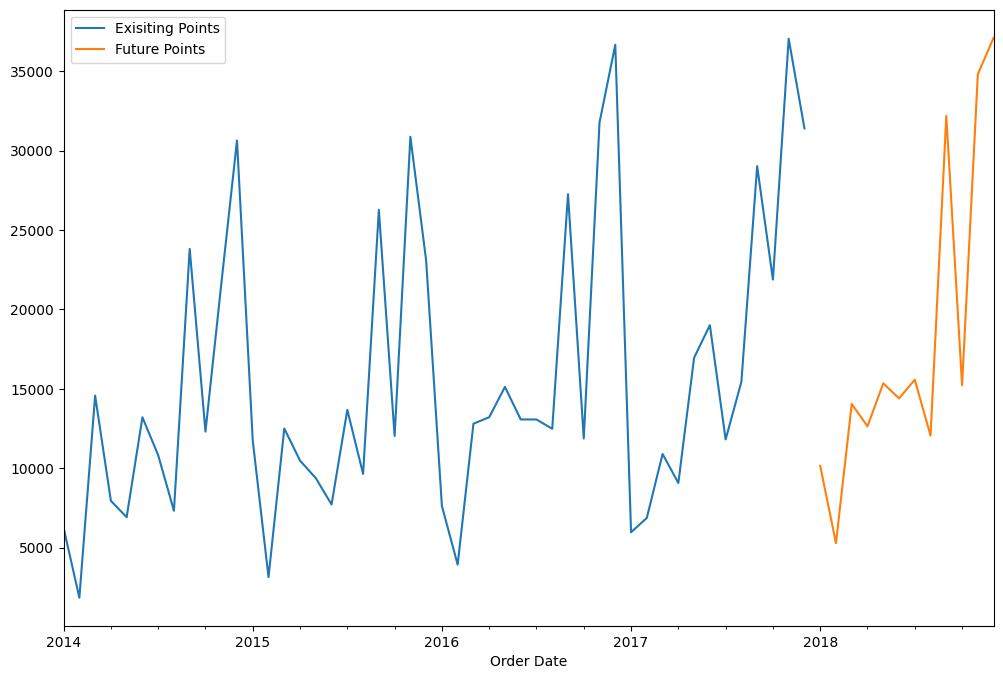

In [ ]:
df['Sales'].plot(figsize=(12, 8), legend=True, label='Exisiting Points')
future_preds.plot(figsize=(12, 8), legend=True, label='Future Points')

In [ ]:
df = pd.read_csv('samples.csv', index_col=0, parse_dates=True)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


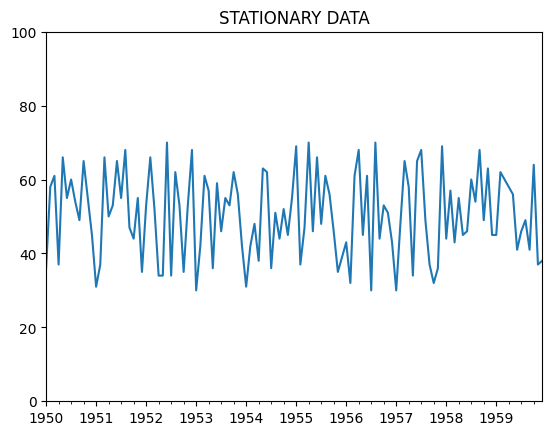

In [ ]:
df['a'].plot(ylim=[0, 100], title='STATIONARY DATA').autoscale(axis='x', tight=True)


<Axes: title={'center': 'Moving Average'}>

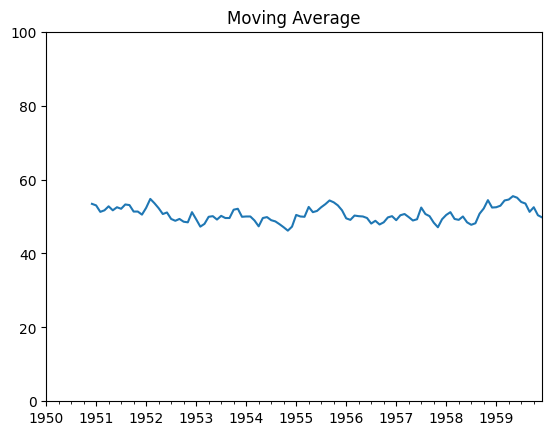

In [ ]:
df['a_ma'] = df['a'].rolling(12).mean()

df['a_ma'].plot(ylim=[0, 100], title='Moving Average')

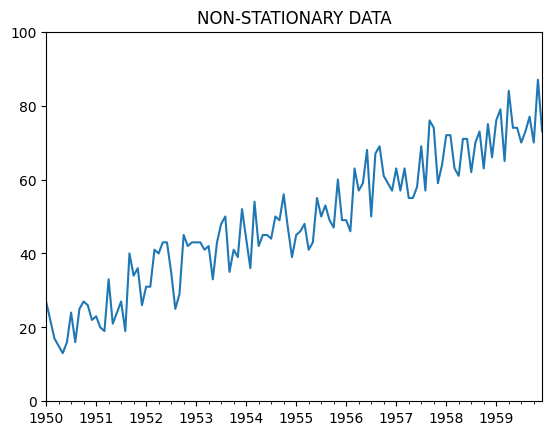

In [ ]:
df['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True)


<Axes: title={'center': 'Moving Average'}>

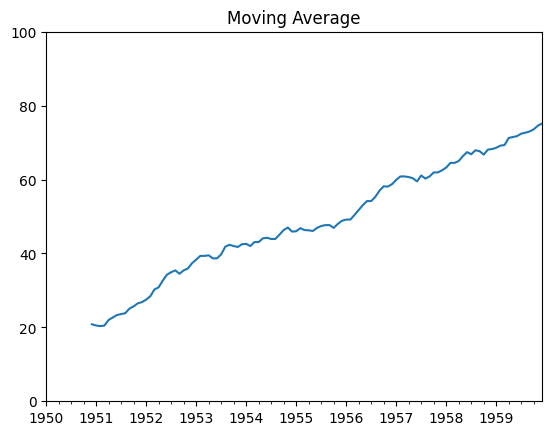

In [ ]:
df['b_ma'] = df['b'].rolling(12).mean()
df['b_ma'].plot(ylim=[0, 100], title='Moving Average')

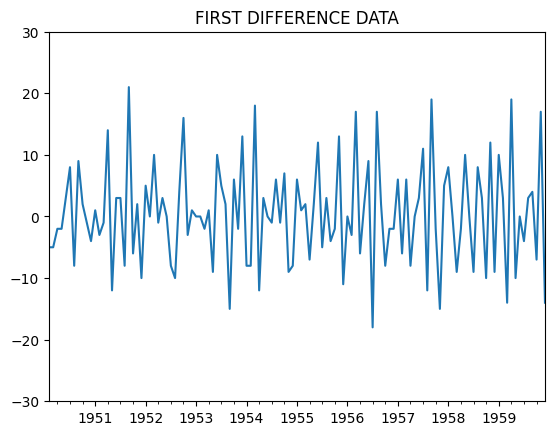

In [ ]:
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['b'],k_diff=1)

df['d1'].plot(title="FIRST DIFFERENCE DATA", ylim=[-30, 30]).autoscale(axis='x',tight=True)

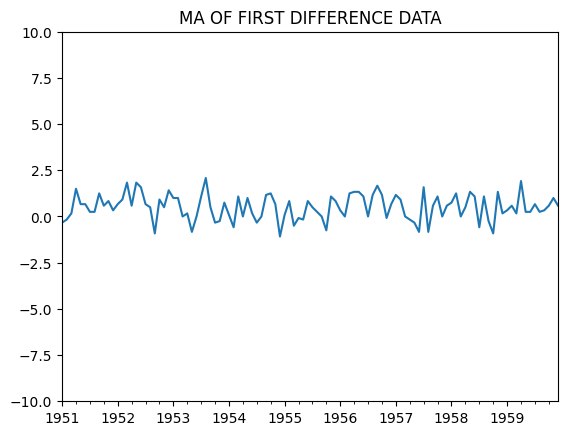

In [ ]:
df['d1_ma'] = df['d1'].rolling(12).mean()

df['d1_ma'].plot(title="MA OF FIRST DIFFERENCE DATA", ylim=[-10, 10]).autoscale(axis='x',tight=True)

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<Axes: >

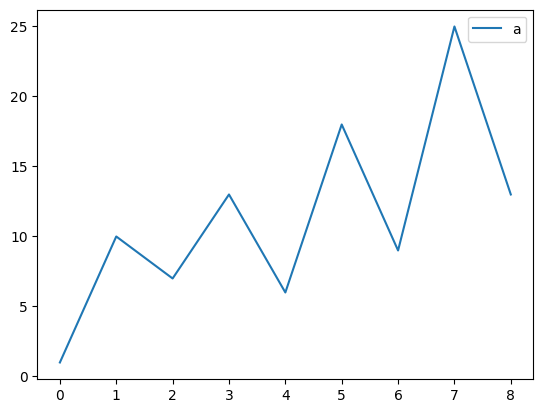

In [ ]:
df = pd.DataFrame({'a':[1, 10, 7, 13, 6, 18, 9, 25, 13]})

df.plot()

In [ ]:
from statsmodels.tsa.stattools import acovf, acf
arr = acovf(df['a'])

arr

array([ 44.22222222,  -6.30864198,  19.60493827, -11.62962963,
         7.80246914, -13.58024691,  -0.14814815, -15.9382716 ,
        -1.91358025])

In [ ]:
arr1 = acovf(df['a'])

arr1

array([ 44.22222222,  -6.30864198,  19.60493827, -11.62962963,
         7.80246914, -13.58024691,  -0.14814815, -15.9382716 ,
        -1.91358025])

In [ ]:
arr3 = acf(df['a'])

arr3

array([ 1.        , -0.14265773,  0.44332775, -0.26298157,  0.17643774,
       -0.30709101, -0.00335008, -0.36041318, -0.04327192])

In [ ]:
from statsmodels.tsa.stattools import pacf_yw
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.14265773,  0.43176344, -0.20758442, -0.04572862])

In [ ]:
arr4 = pacf_yw(df['a'],nlags=4,method='adjusted')
arr4

array([ 1.        , -0.16048995,  0.5586243 , -0.39456104,  0.01906252])

In [ ]:
from statsmodels.tsa.stattools import pacf_ols
arr5 = pacf_ols(df['a'],nlags=4)
arr5

array([ 1.        , -0.13833492,  1.13495418, -0.04476691,  0.5979815 ])

In [ ]:
from pandas.plotting import lag_plot


In [ ]:
df = pd.read_excel('Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df['Category'].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [ ]:
df = pd.read_excel('Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Office Supplies']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340


In [ ]:
df = df.resample('W').sum()

df.head()

,Sales
Order Date,
2014-01-05,324.044
2014-01-12,708.004
2014-01-19,2337.764
2014-01-26,1143.170
2014-02-02,368.784


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

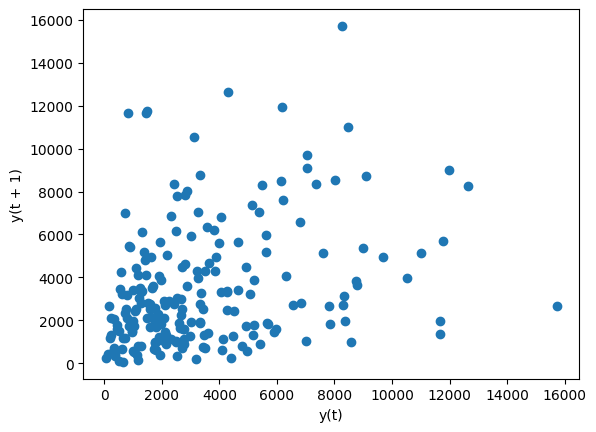

In [ ]:
lag_plot(df['Sales'])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
acf(df['Sales'])


array([ 1.00000000e+00,  3.12440082e-01,  2.49173025e-01,  1.39336867e-01,
        1.84489786e-01,  1.67531418e-01,  1.11379734e-01,  1.84930768e-01,
        8.24198806e-02,  8.74684994e-02,  4.89924777e-02,  6.22098365e-02,
        1.65448013e-01,  1.49072360e-01,  7.97573259e-02,  7.65911202e-02,
        7.55594141e-02, -7.46386648e-04,  4.97054222e-02, -2.10402529e-02,
       -2.49880823e-02, -6.68093251e-02, -1.79718855e-02, -3.42941758e-02])

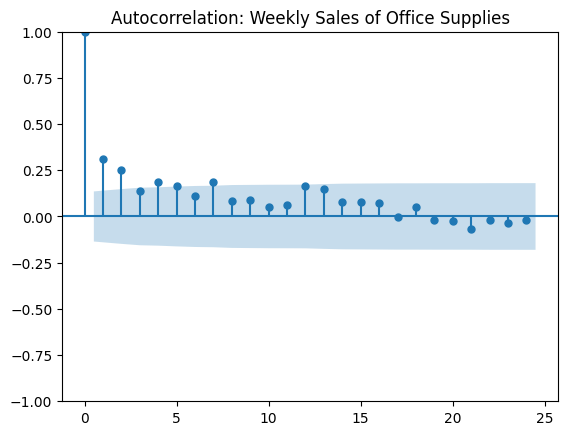

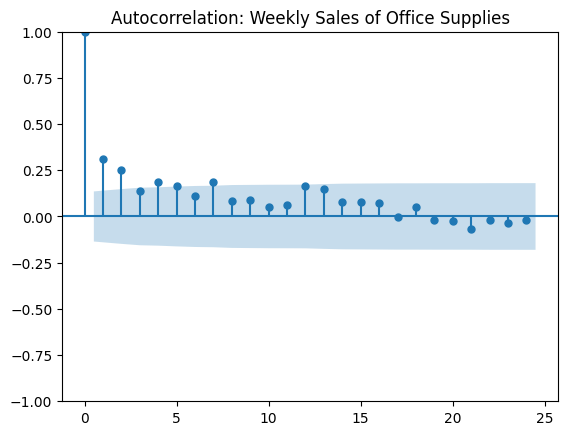

In [ ]:
title = 'Autocorrelation: Weekly Sales of Office Supplies'
lags = 40
plot_acf(df['Sales'], title=title)

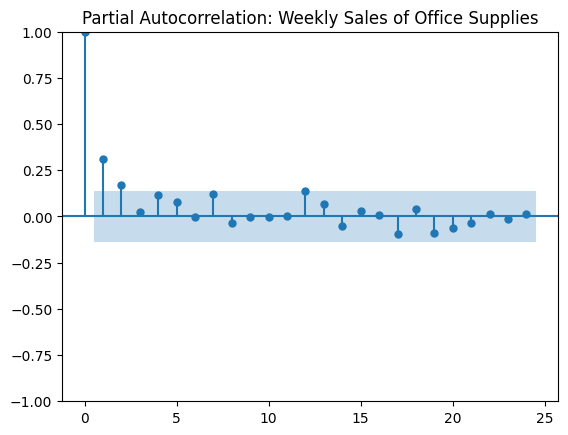

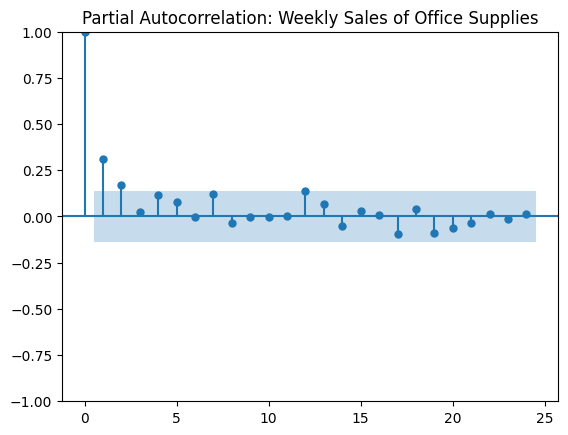

In [ ]:
title = 'Partial Autocorrelation: Weekly Sales of Office Supplies'
lags = 40
plot_pacf(df['Sales'], title=title)

In [ ]:
from statsmodels.tsa.ar_model import AR,ARResults

#plot the sales data of Office Supplies
df = pd.read_excel('Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [ ]:
df = df.resample('M').sum()

df.head()

,Sales
Order Date,
2014-01-31,6242.525
2014-02-28,1839.658
2014-03-31,14573.956
2014-04-30,7944.837
2014-05-31,6912.787


[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

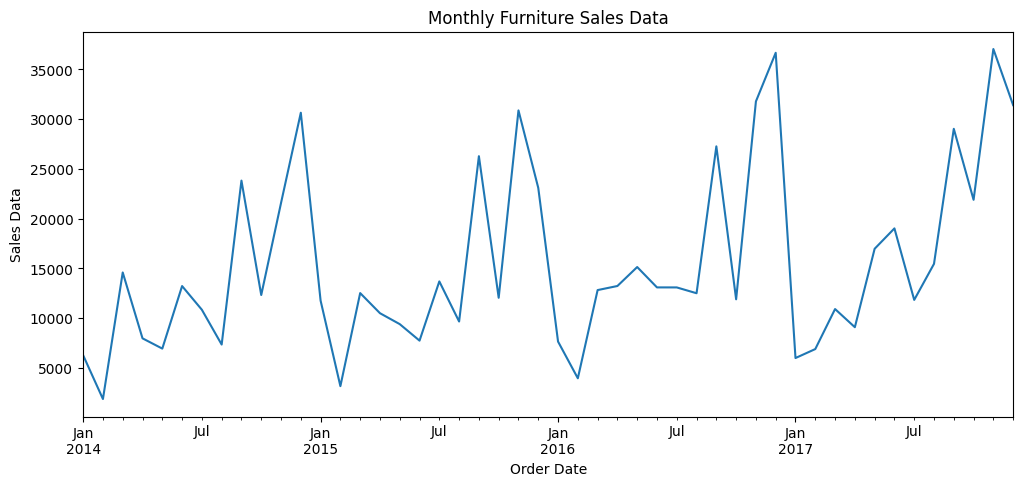

In [ ]:
title='Monthly Furniture Sales Data'
ylabel='Sales Data'
xlabel='Order Date'

ax = df['Sales'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
len(df)


48

In [ ]:
train = df.iloc[:len(df)-6]
test = df.iloc[len(df)-6:]

print(f"Train size is {len(train)}")
print(f"Test size is {len(test)}")

Train size is 42
Test size is 6


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.ar_model import AutoReg

In [ ]:
mod1 = AutoReg(train['Sales'], 1, old_names=False)
res1 = mod1.fit()
print(res1.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     AutoReg(1)   Log Likelihood                -427.247
Method:               Conditional MLE   S.D. of innovations           8116.944
Date:                Thu, 24 Apr 2025   AIC                            860.493
Time:                        07:10:19   BIC                            865.634
Sample:                    02-28-2014   HQIC                           862.365
                         - 06-30-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.172e+04   2487.380      4.712      0.000    6845.693    1.66e+04
Sales.L1       0.1884      0.152      1.237      0.216      -0.110       0.487
                                    Roots           

In [ ]:
print(f'Lag: {res1.arfreq}')
print(f'Coefficients:\n{res1.params}')

Lag: [0.]
Coefficients:
const       11720.868755
Sales.L1        0.188372
dtype: float64


In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = res1.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')
predictions1

,AR(1) Predictions
2017-07-31,15301.562179
2017-08-31,14603.261009
2017-09-30,14471.720330
2017-10-31,14446.941694
2017-11-30,14442.274083
2017-12-31,14441.394833


In [ ]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['Sales'][i]}")

predicted=15301.56218, expected=11813.021999999999
predicted=14603.26101, expected=15441.874
predicted=14471.72033, expected=29028.206000000002
predicted=14446.94169, expected=21884.0682
predicted=14442.27408, expected=37056.715
predicted=14441.39483, expected=31407.4668


<Axes: xlabel='Order Date'>

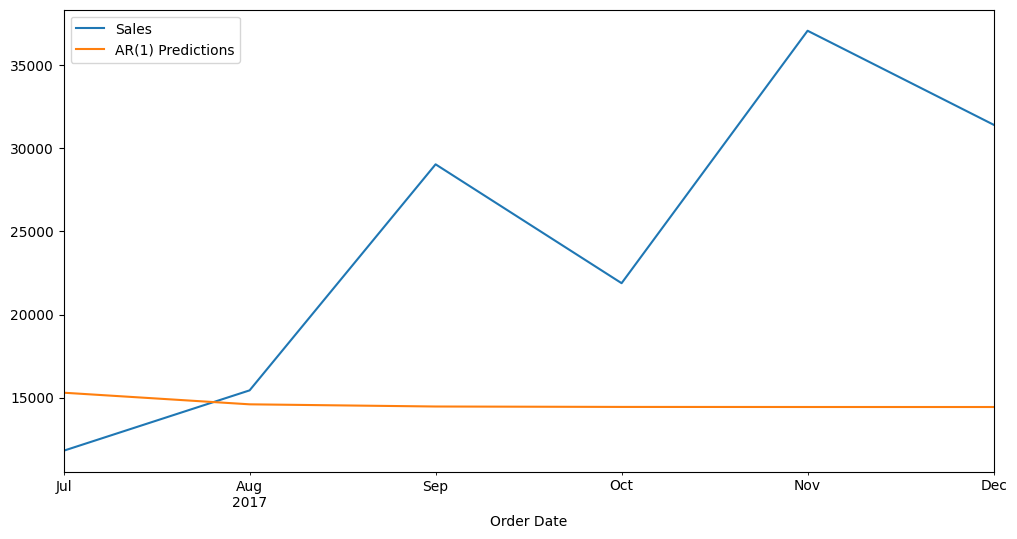

In [ ]:
test['Sales'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))

In [ ]:
mod6 = AutoReg(train['Sales'], 6)
res6 = mod6.fit()
print(res6.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     AutoReg(6)   Log Likelihood                -373.443
Method:               Conditional MLE   S.D. of innovations           7742.555
Date:                Thu, 24 Apr 2025   AIC                            762.887
Time:                        07:10:24   BIC                            775.555
Sample:                    07-31-2014   HQIC                           767.308
                         - 06-30-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.93e+04   5788.110      3.334      0.001    7950.646    3.06e+04
Sales.L1       0.1277      0.165      0.774      0.439      -0.196       0.451
Sales.L2      -0.0805      0.162     -0.496      0.6

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions6 = res6.predict(start=start, end=end, dynamic=False).rename('AR(6) Predictions')
predictions6

,AR(6) Predictions
2017-07-31,17121.629045
2017-08-31,16914.370614
2017-09-30,15703.623235
2017-10-31,13359.612451
2017-11-30,13669.199630
2017-12-31,14347.505858


<Axes: xlabel='Order Date'>

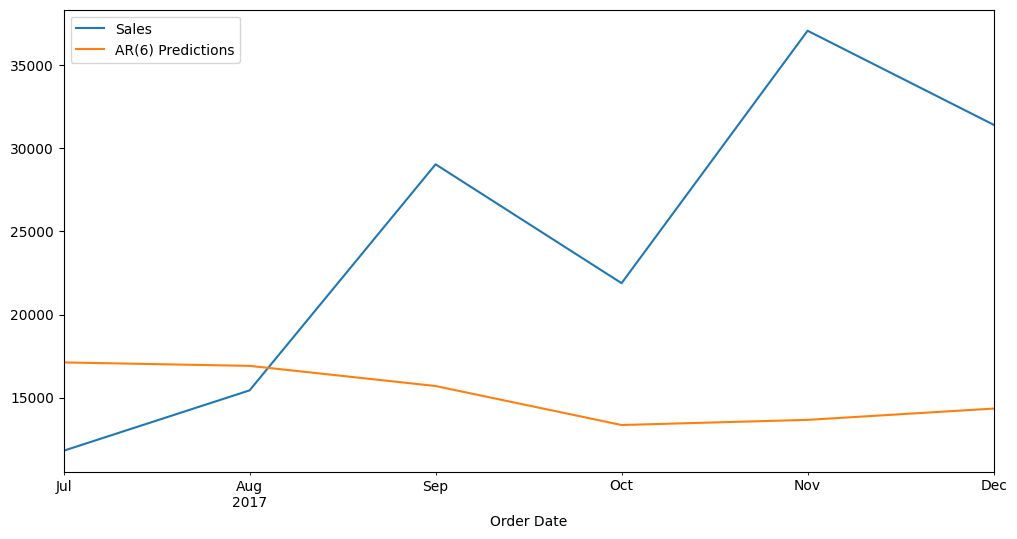

In [ ]:
test['Sales'].plot(legend=True)
predictions6.plot(legend=True,figsize=(12,6))

In [ ]:
from statsmodels.tsa.ar_model import ar_select_order


In [ ]:
p = ar_select_order(train['Sales'], maxlag=15)


In [ ]:
p.ar_lags


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
mod12 = AutoReg(train['Sales'], 12)
res12 = mod12.fit()
print(res12.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   42
Model:                    AutoReg(12)   Log Likelihood                -290.930
Method:               Conditional MLE   S.D. of innovations           3939.183
Date:                Thu, 24 Apr 2025   AIC                            609.860
Time:                        07:10:30   BIC                            629.477
Sample:                    01-31-2015   HQIC                           616.136
                         - 06-30-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6179.8244   9948.341      0.621      0.534   -1.33e+04    2.57e+04
Sales.L1       0.0175      0.102      0.172      0.864      -0.182       0.217
Sales.L2      -0.0058      0.104     -0.056      0.9

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions12 = res12.predict(start=start, end=end, dynamic=False).rename('AR(6) Predictions')

<Axes: xlabel='Order Date'>

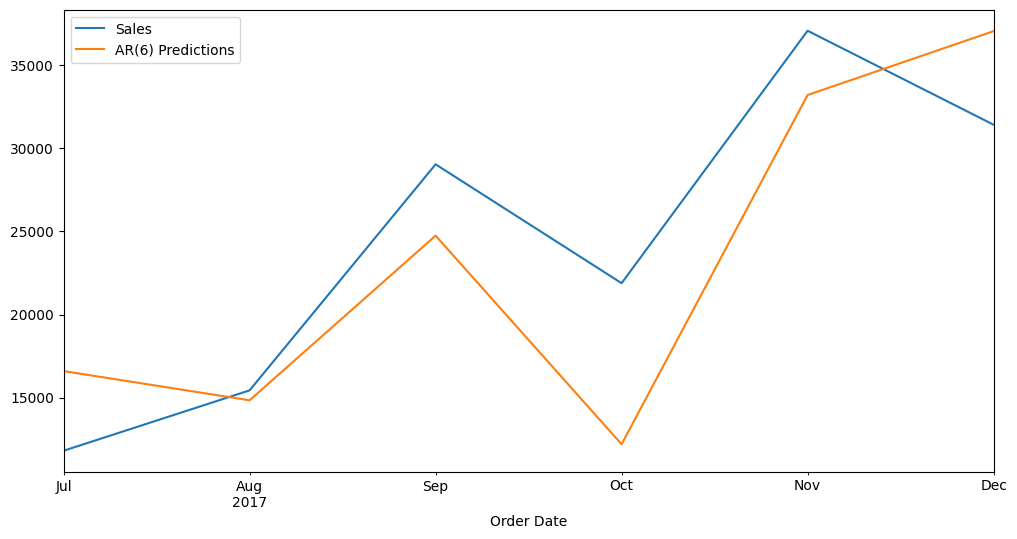

In [ ]:
test['Sales'].plot(legend=True)
predictions12.plot(legend=True,figsize=(12,6))

In [ ]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(6)','AR(12)']
preds = [predictions1, predictions6, predictions12]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['Sales'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 179889307.7
AR(6) Error: 186429758.2
AR(12) Error: 30320630.65


In [ ]:
modls = [res1,res6,res12]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 860.49
AR(6) AIC: 762.89
AR(12) AIC: 609.86


In [ ]:
mod12 = AutoReg(df['Sales'], 12)
res12 = mod12.fit()
print(res12.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   48
Model:                    AutoReg(12)   Log Likelihood                -349.076
Method:               Conditional MLE   S.D. of innovations           3934.790
Date:                Thu, 24 Apr 2025   AIC                            726.152
Time:                        07:10:35   BIC                            748.321
Sample:                    01-31-2015   HQIC                           733.889
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4356.0138   7562.612      0.576      0.565   -1.05e+04    1.92e+04
Sales.L1       0.0321      0.088      0.366      0.715      -0.140       0.204
Sales.L2      -0.0097      0.094     -0.102      0.9

In [ ]:
start = len(df)
end = len(df)+12

pred_future = res12.predict(start=start, end=end, dynamic=False)

pred_future

,0
2018-01-31,6022.626972
2018-02-28,5739.250407
2018-03-31,9199.016790
2018-04-30,9976.759362
2018-05-31,19661.613494
2018-06-30,20722.318428
2018-07-31,13609.961837
2018-08-31,18080.731150
2018-09-30,29604.129926
2018-10-31,26437.359412


<Axes: xlabel='Order Date'>

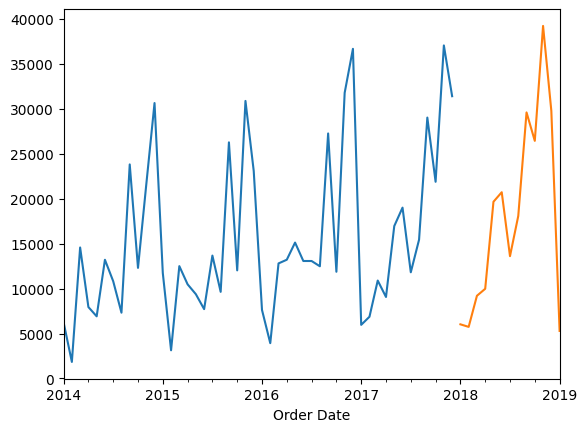

In [ ]:
df['Sales'].plot()
pred_future.plot()

In [ ]:
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
!pip install numpy==1.24.4
!pip install pmdarima
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [ ]:
df = df.resample('MS').sum()

In [ ]:
df.head()

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

<Axes: xlabel='Order Date'>

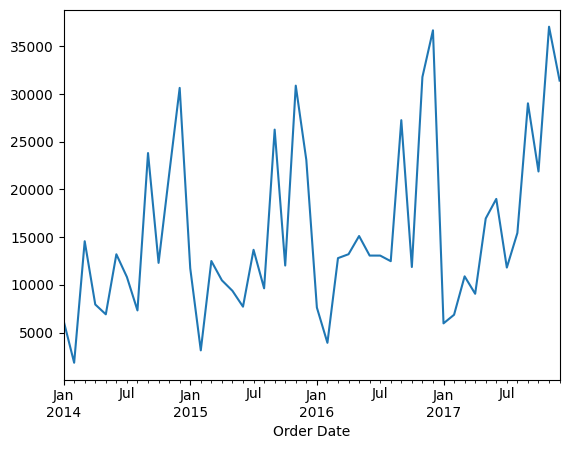

In [ ]:
df['Sales'].plot()


In [ ]:
adf_test(df['Sales'])


Augmented Dickey-Fuller Test: 
ADF test statistic      -4.699026
p-value                  0.000085
# lags used              0.000000
# observations          47.000000
critical value (1%)     -3.577848
critical value (5%)     -2.925338
critical value (10%)    -2.600774
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
auto_arima(df['Sales'], seasonal=True).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -502.820
Date:                Thu, 24 Apr 2025   AIC                           1011.640
Time:                        07:10:58   BIC                           1017.253
Sample:                    01-01-2014   HQIC                          1013.761
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.084e+04   2695.066      4.021      0.000    5554.237    1.61e+04
ar.L1          0.3056      0.131      2.328      0.020       0.048       0.563
sigma2      7.318e+07      0.160   4.56e+08      0.000    7.32e+07    7.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.98   Prob(JB):                         0.16
Heteroskedasticity (H):               1.88   Skew:                             0.64
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+24. Standard errors may be unstable.
"""

In [ ]:
train = df.iloc[:len(df)-6]
test = df.iloc[len(df)-6:]

len(train), len(test)

(42, 6)

In [ ]:
help(ARMA)


Help on class ARMA in module statsmodels.tsa.arima_model:

class ARMA(builtins.object)
 |  ARMA(*args, **kwargs)
 |  
 |  ARMA has been deprecated in favor of the new implementation
 |  
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables
 |  
 |  __weakref__
 |      list of weak references to the object



In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
model = ARIMA(train['Sales'],order=(2,0,2))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -436.980
Date:                Thu, 24 Apr 2025   AIC                            885.960
Time:                        07:11:03   BIC                            896.386
Sample:                    01-01-2014   HQIC                           889.782
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.418e+04   1427.017      9.934      0.000    1.14e+04     1.7e+04
ar.L1          0.6732      0.810      0.831      0.406      -0.914       2.260
ar.L2          0.1773      0.842      0.211      0.833      -1.474       1.828
ma.L1         -0.5278      0.739     -0.714      0.475      -1.977       0.921
ma.L2         -0.4528      0.771     -0.587      0.557      -1.964       1.059
sigma2       7.04e+07      0.014   4.87e+09      0.000    7.04e+07    7.04e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.53
Prob(Q):                              0.93   Prob(JB):                         0.01
Heteroskedasticity (H):               1.31   Skew:                             1.10
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.06e+25. Standard errors may be unstable.
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')
predictions


,"ARMA(2,2) Predictions"
2017-07-01,13115.074287
2017-08-01,12031.112131
2017-09-01,12543.910541
2017-10-01,12696.894220
2017-11-01,12890.811998
2017-12-01,13048.480080


[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

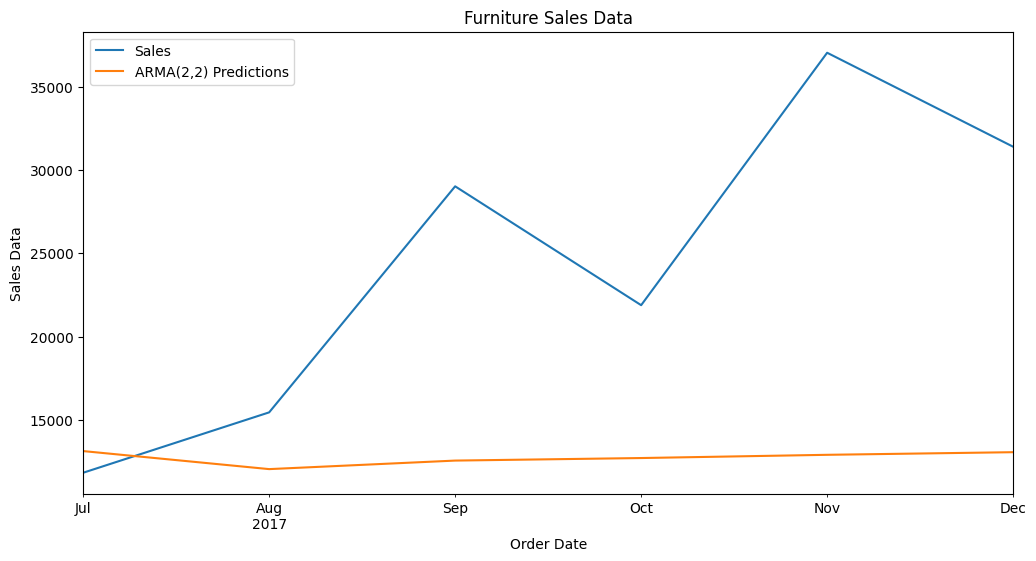

In [ ]:
title = 'Furniture Sales Data'
ylabel='Sales Data'
xlabel='Order Date' # we don't really need a label here

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


In [ ]:
df = pd.read_excel('Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [ ]:
df = df.resample('MS').sum()


In [ ]:
df.head()


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


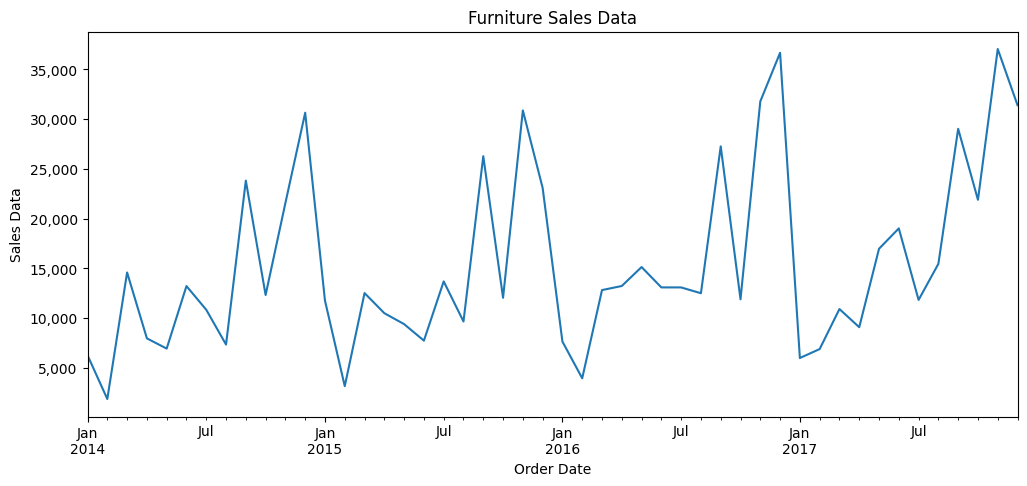

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Furniture Sales Data'
ylabel='Sales Data'
xlabel='Order Date'

ax = df['Sales'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

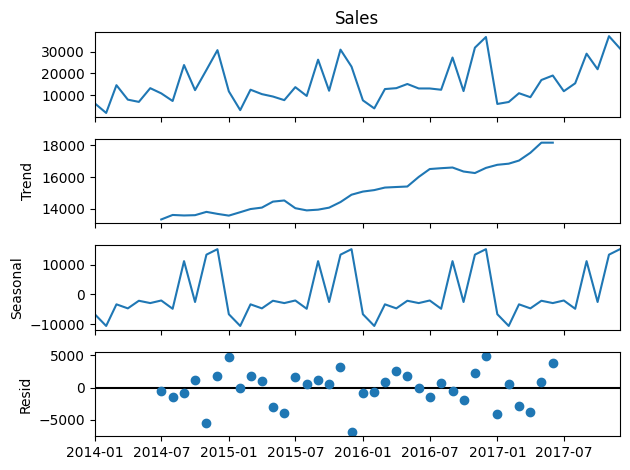

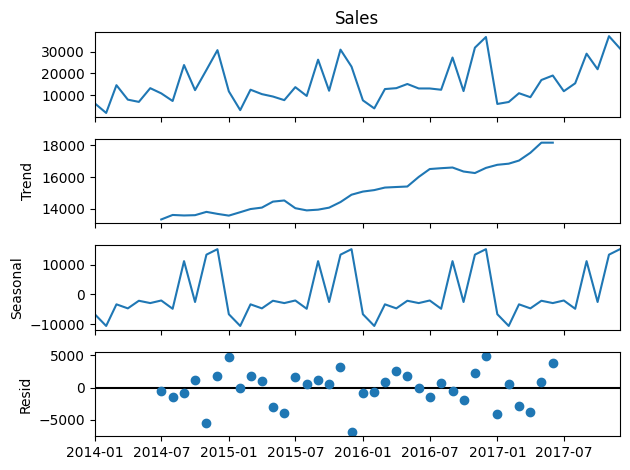

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive')  # model='add' also works
result.plot()


In [ ]:
auto_arima(df['Sales'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -502.820
Date:                Thu, 24 Apr 2025   AIC                           1011.640
Time:                        07:11:14   BIC                           1017.253
Sample:                    01-01-2014   HQIC                          1013.761
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.084e+04   2695.066      4.021      0.000    5554.237    1.61e+04
ar.L1          0.3056      0.131      2.328      0.020       0.048       0.563
sigma2      7.318e+07      0.160   4.56e+08      0.000    7.32e+07    7.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.98   Prob(JB):                         0.16
Heteroskedasticity (H):               1.88   Skew:                             0.64
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+24. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['Sales'], k_diff=1)

adf_test(df['d1'], 'Furniture Sales Data')

Augmented Dickey-Fuller Test: Furniture Sales Data
ADF test statistic     -1.147459e+01
p-value                 5.167971e-21
# lags used             1.000000e+01
# observations          3.600000e+01
critical value (1%)    -3.626652e+00
critical value (5%)    -2.945951e+00
critical value (10%)   -2.611671e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


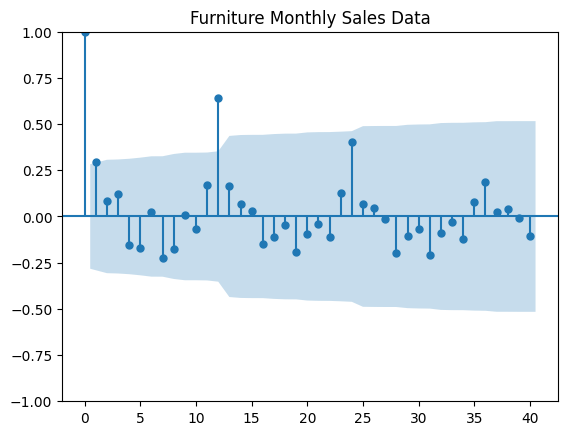

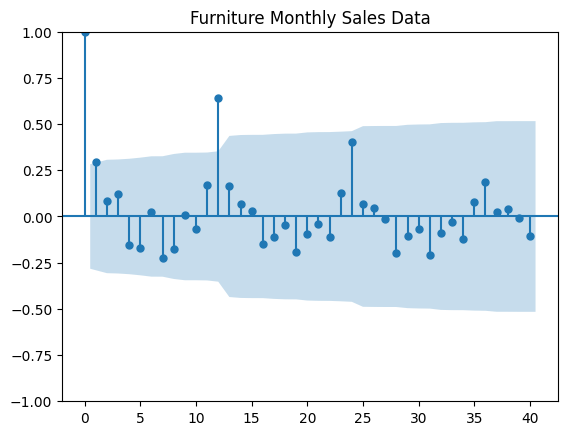

In [ ]:
title = 'Furniture Monthly Sales Data'
lags = 40
plot_acf(df['Sales'],title=title,lags=lags)

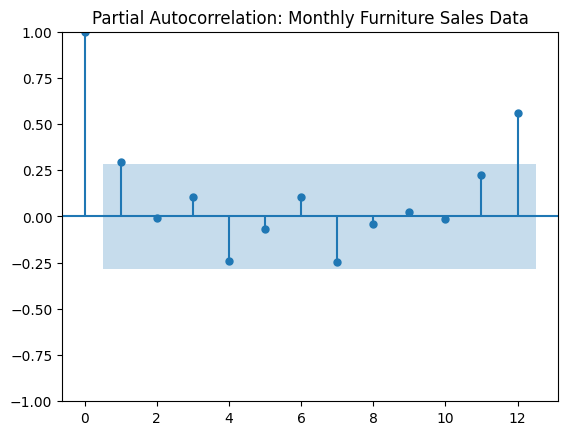

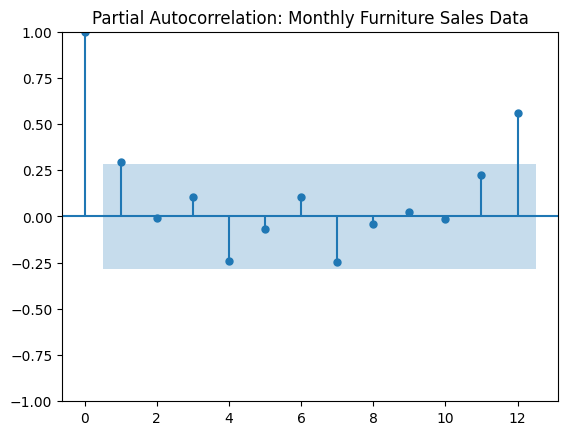

In [ ]:
title = 'Partial Autocorrelation: Monthly Furniture Sales Data'
lags = 12
plot_pacf(df['Sales'],title=title,lags=lags)

In [ ]:
stepwise_fit = auto_arima(df['Sales'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1078.259, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1026.129, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1059.367, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1022.619, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1018.040, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1018.347, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1020.706, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1019.172, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1015.561, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1013.580, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1011.909, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1014.386, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1013.938, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1011.640, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -502.820
Date:                Thu, 24 Apr 2025   AIC                           1011.640
Time:                        07:11:15   BIC                           1017.253
Sample:                    01-01-2014   HQIC                          1013.761
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.084e+04   2695.066      4.021      0.000    5554.237    1.61e+04
ar.L1          0.3056      0.131      2.328      0.020       0.048       0.563
sigma2      7.318e+07      0.160   4.56e+08      0.000    7.32e+07    7.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.98   Prob(JB):                         0.16
Heteroskedasticity (H):               1.88   Skew:                             0.64
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+24. Standard errors may be unstable.
"""

In [ ]:
n = len(df)
test_size = 12
train = df.iloc[:n-test_size]
test = df.iloc[n-test_size:]

In [ ]:
model = ARIMA(train['Sales'], order=(1, 0, 0))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -376.058
Date:                Thu, 24 Apr 2025   AIC                            758.116
Time:                        07:11:16   BIC                            762.867
Sample:                    01-01-2014   HQIC                           759.774
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.463e+04   1934.689      7.561      0.000    1.08e+04    1.84e+04
ar.L1          0.2825      0.170      1.658      0.097      -0.051       0.616
sigma2      6.929e+07      0.134   5.15e+08      0.000    6.93e+07    6.93e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.92   Prob(JB):                         0.11
Heteroskedasticity (H):               1.40   Skew:                             0.83
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+24. Standard errors may be unstable.
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,0,0) Predictions')
predictions

,"ARIMA(1,0,0) Predictions"
2017-01-01,20856.524035
2017-02-01,16387.395968
2017-03-01,15125.048311
2017-04-01,14768.486230
2017-05-01,14667.771885
2017-06-01,14639.324162
2017-07-01,14631.288832
2017-08-01,14629.019177
2017-09-01,14628.378091
2017-10-01,14628.197011


In [ ]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Sales'][i]}")

predicted=20856.52404, expected=5964.032
predicted=16387.39597, expected=6866.3374
predicted=15125.04831, expected=10893.4448
predicted=14768.48623, expected=9065.9581
predicted=14667.77188, expected=16957.5582
predicted=14639.32416, expected=19008.5867
predicted=14631.28883, expected=11813.021999999999
predicted=14629.01918, expected=15441.874
predicted=14628.37809, expected=29028.206000000002
predicted=14628.19701, expected=21884.0682
predicted=14628.14586, expected=37056.715
predicted=14628.13142, expected=31407.4668


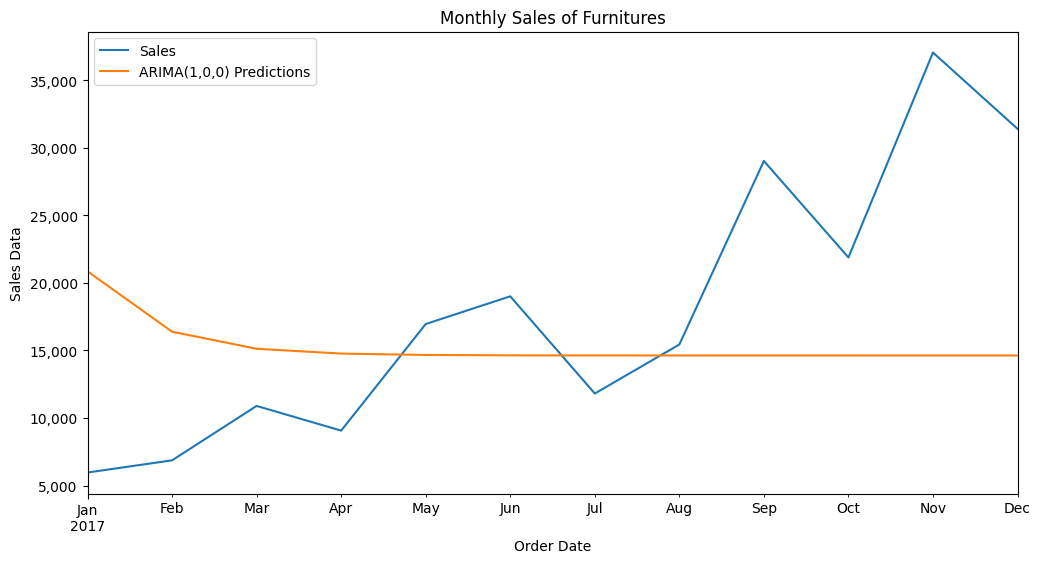

In [ ]:
title = 'Monthly Sales of Furnitures'
ylabel='Sales Data'
xlabel='Order Date'

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Sales'], predictions)
print(f'ARIMA(1,0,0) MSE Error: {error:11.10}')

ARIMA(1,0,0) MSE Error: 120032385.7


In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Sales'], predictions)
print(f'ARIMA(1,0,0) RMSE Error: {error:11.10}')

ARIMA(1,0,0) RMSE Error: 10955.92925


In [ ]:
model = ARIMA(df['Sales'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('ARIMA(1,0,0) Forecast')

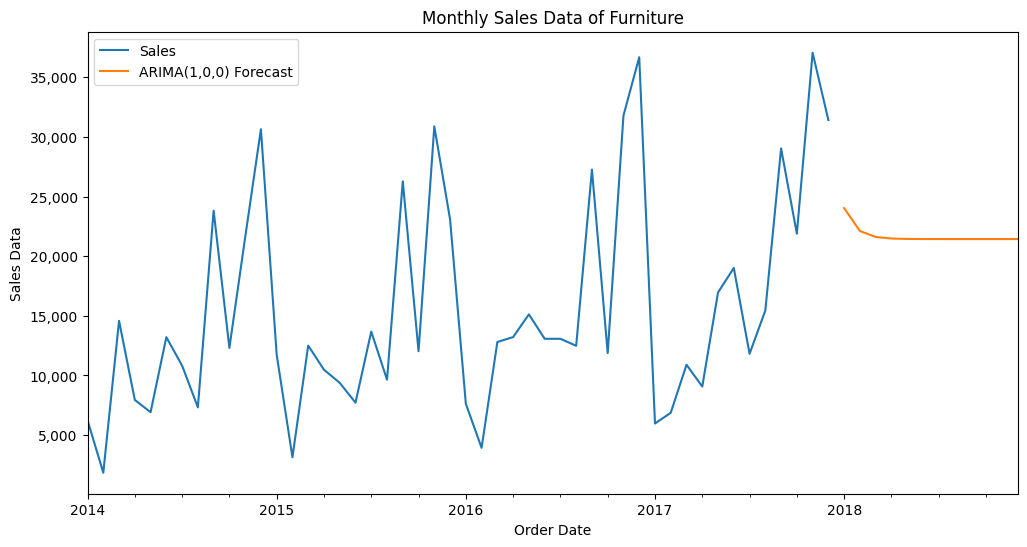

In [ ]:
title = 'Monthly Sales Data of Furniture'
ylabel='Sales Data'
xlabel='Order Date'

ax = df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [ ]:
df = df.resample('MS').sum()


<Axes: xlabel='Order Date'>

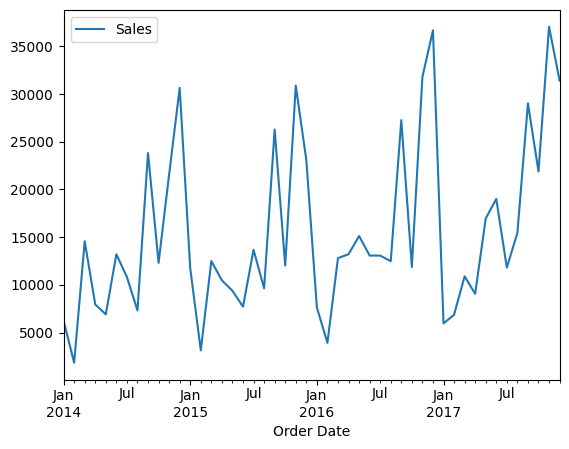

In [ ]:
df.plot()


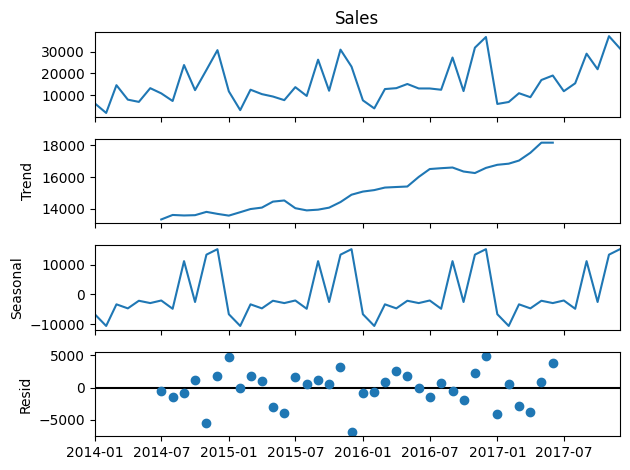

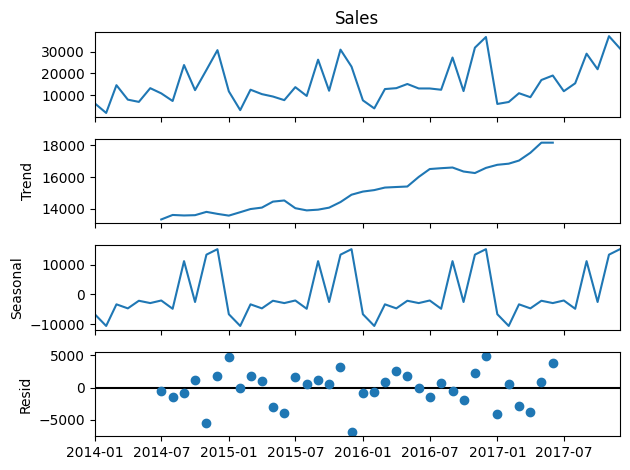

In [ ]:
result = seasonal_decompose(df['Sales'], model='add')
result.plot()

In [ ]:
auto_arima(df['Sales'],seasonal=True,m=12).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   48
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -349.872
Date:                  Thu, 24 Apr 2025   AIC                            707.744
Time:                          07:11:31   BIC                            714.078
Sample:                      01-01-2014   HQIC                           709.955
                           - 12-01-2017                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1616.5115   1257.009      1.286      0.198    -847.181    4080.205
ar.S.L12      -0.1196      0.087     -1.378      0.168      -0.290       0.051
ar.S.L24       0.1214      0.098      1.240      0.215      -0.070       0.313
sigma2      1.862e+07      0.036    5.1e+08      0.000    1.86e+07    1.86e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.40   Prob(JB):                         0.39
Heteroskedasticity (H):               0.96   Skew:                             0.55
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+25. Standard errors may be unstable.
"""

In [ ]:
train = df.iloc[:len(df)-6]
test = df.iloc[len(df)-6:]

In [ ]:
model = SARIMAX(train['Sales'],order=(0,1,3),seasonal_order=(2,1,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   42
Model:             SARIMAX(0, 1, 3)x(2, 1, [], 12)   Log Likelihood                -289.730
Date:                             Thu, 24 Apr 2025   AIC                            591.461
Time:                                     07:11:39   BIC                            599.664
Sample:                                 01-01-2014   HQIC                           594.030
                                      - 06-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3976      0.146     -2.722      0.006      -0.684      -0.111
ma.L2         -0.1639      0.156     -1.053      0.292      -0.469       0.141
ma.L3         -0.1625      0.167     -0.972      0.331      -0.490       0.165
ar.S.L12      -0.1664      0.118     -1.404      0.160      -0.399       0.066
ar.S.L24       0.2224      0.130      1.710      0.087      -0.033       0.477
sigma2      2.461e+07   5.24e-10    4.7e+16      0.000    2.46e+07    2.46e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.15   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.14   Prob(JB):                         0.65
Heteroskedasticity (H):               0.75   Skew:                             0.17
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.01e+32. Standard errors may be unstable.
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

In [ ]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Sales'][i]}")

predicted=18982.66877, expected=11813.021999999999
predicted=15746.93545, expected=15441.874
predicted=29761.95657, expected=29028.206000000002
predicted=13953.797  , expected=21884.0682
predicted=35822.90086, expected=37056.715
predicted=34853.24127, expected=31407.4668


[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

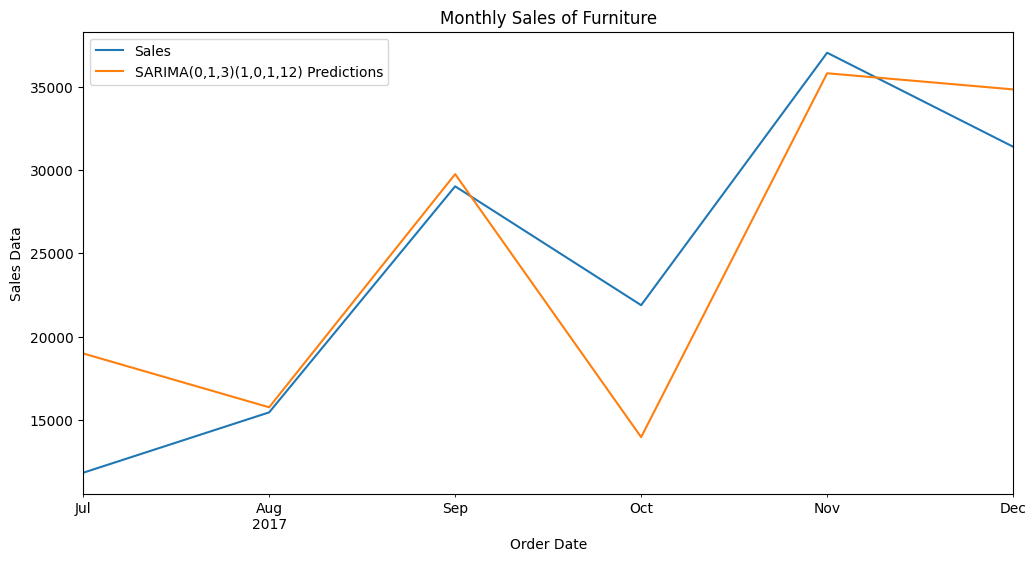

In [ ]:
title = 'Monthly Sales of Furniture'
ylabel='Sales Data'
xlabel='Order Date'

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Sales'], predictions)
print(f'SARIMA(2,0,1,12) MSE Error: {error:11.10}')

SARIMA(2,0,1,12) MSE Error: 21386691.25


In [ ]:
model = SARIMAX(df['Sales'],order=(1,0,2),seasonal_order=(2,1,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+12,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

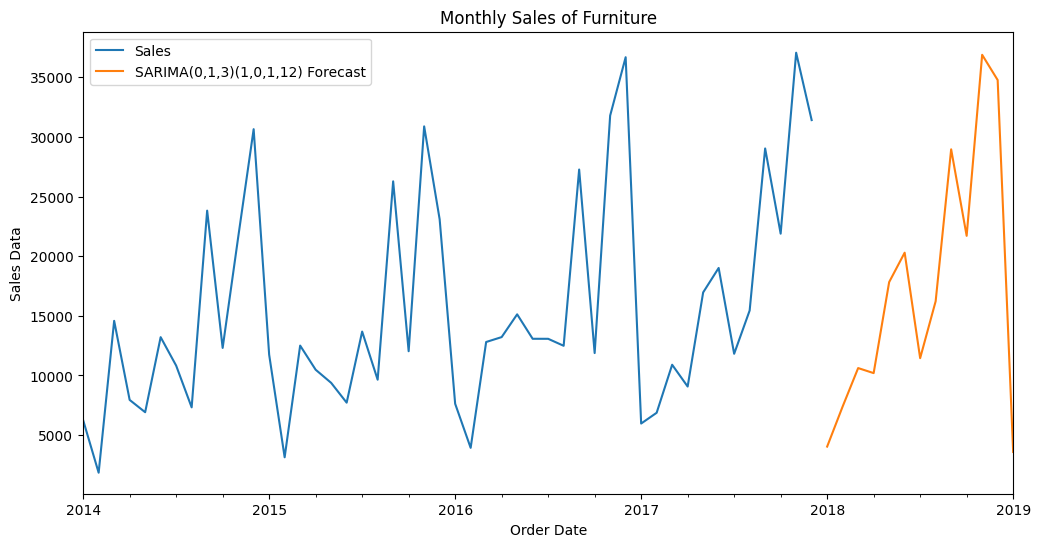

In [ ]:
title = 'Monthly Sales of Furniture'
ylabel='Sales Data'
xlabel='Order Date'

ax = df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum, 'Quantity':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales,Quantity
Order Date,,
2014-01-06,2573.820,9
2014-01-07,76.728,3
2014-01-10,51.940,1
2014-01-11,9.940,2


In [ ]:
df = df.resample('W').sum()

df.head()

,Sales,Quantity
Order Date,,
2014-01-12,2712.428,15
2014-01-19,1250.473,24
2014-01-26,1655.958,26
2014-02-02,623.666,5
2014-02-09,14.560,2


<Axes: xlabel='Order Date'>

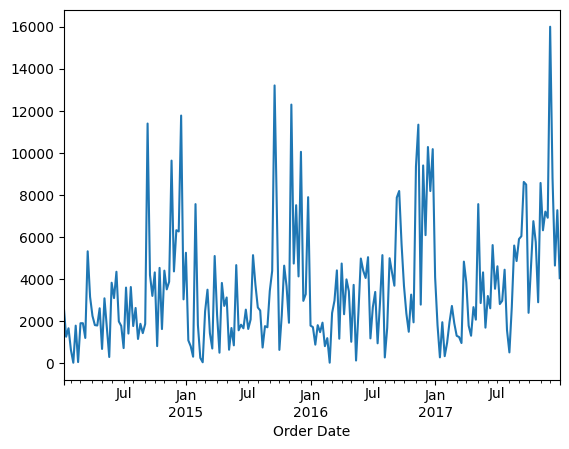

In [ ]:
df['Sales'].plot()


<Axes: xlabel='Order Date'>

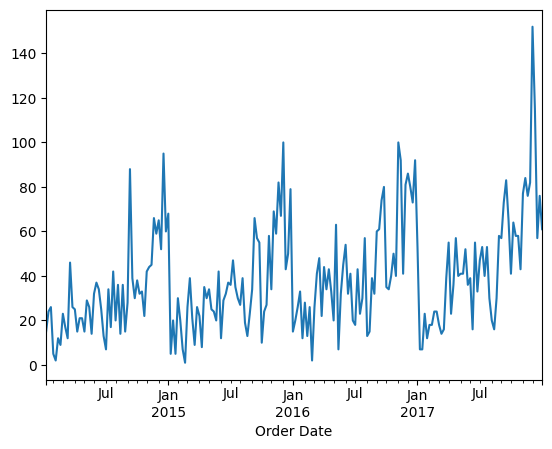

In [ ]:
df['Quantity'].plot()


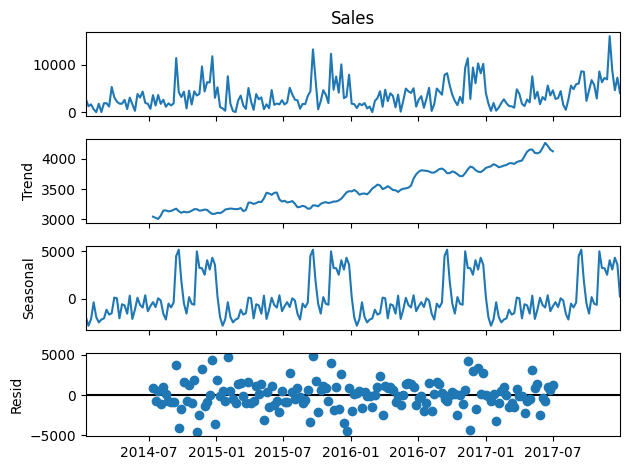

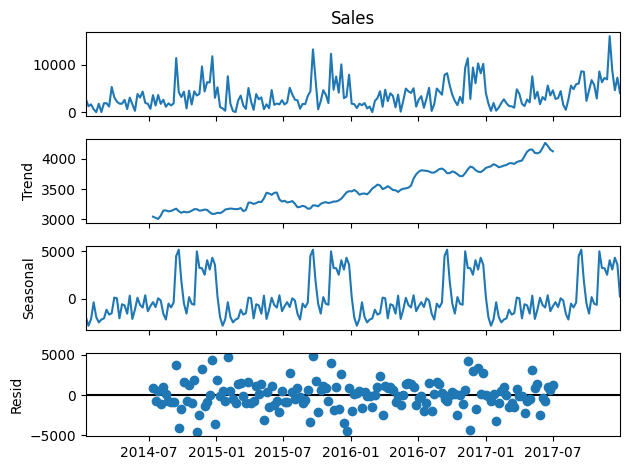

In [ ]:
result_sales = seasonal_decompose(df['Sales'])

result_sales.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df['Sales'])


Augmented Dickey-Fuller Test: 
ADF test statistic       -3.444275
p-value                   0.009539
# lags used               6.000000
# observations          201.000000
critical value (1%)      -3.463309
critical value (5%)      -2.876029
critical value (10%)     -2.574493
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(df['Quantity'])


Augmented Dickey-Fuller Test: 
ADF test statistic       -4.457632
p-value                   0.000234
# lags used               4.000000
# observations          203.000000
critical value (1%)      -3.462980
critical value (5%)      -2.875885
critical value (10%)     -2.574416
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
auto_arima(df['Sales'],bseasonal=True, m=12).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  208
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1917.198
Date:                Thu, 24 Apr 2025   AIC                           3842.396
Time:                        07:12:28   BIC                           3855.727
Sample:                    01-12-2014   HQIC                          3847.787
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7864      0.166      4.732      0.000       0.461       1.112
ma.L1         -1.4946      0.201     -7.447      0.000      -1.888      -1.101
ma.L2          0.5044      0.183      2.763      0.006       0.147       0.862
sigma2      6.442e+06   4.47e-08   1.44e+14      0.000    6.44e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               130.12
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             1.32
Prob(H) (two-sided):                  0.14   Kurtosis:                         5.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.55e+30. Standard errors may be unstable.
"""

In [ ]:
len(df)


208

In [ ]:
train = df.iloc[:170]
test = df.iloc[170:]

In [ ]:
model = SARIMAX(train['Sales'],order=(1,1,2) ,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  170
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1573.035
Date:                Thu, 24 Apr 2025   AIC                           3154.069
Time:                        07:12:28   BIC                           3166.589
Sample:                    01-12-2014   HQIC                          3159.150
                         - 04-09-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7910      0.528     -1.499      0.134      -1.825       0.243
ma.L1         -0.2794      0.479     -0.583      0.560      -1.218       0.660
ma.L2         -0.9240      0.525     -1.759      0.079      -1.953       0.105
sigma2      6.972e+06   9.33e+05      7.472      0.000    5.14e+06     8.8e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.41   Jarque-Bera (JB):                70.94
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             1.14
Prob(H) (two-sided):                  0.44   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(1,0,0)(2,0,0,7) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Visitors per day')]

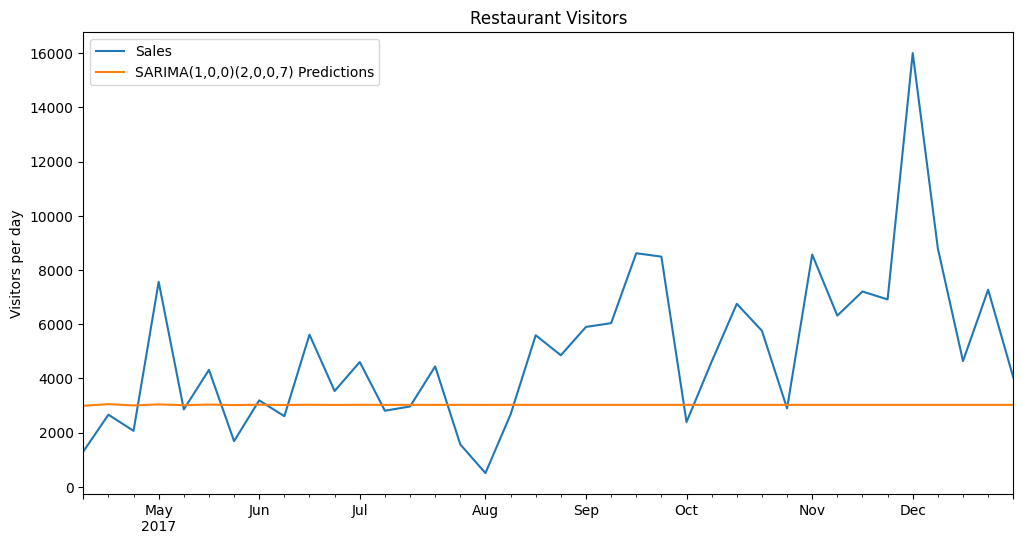

In [ ]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['Sales'], predictions)
error2 = rmse(test['Sales'], predictions)

print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2:11.10}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 12077452.14
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 3475.262887


In [ ]:
df.columns


Index(['Sales', 'Quantity'], dtype='object')

In [ ]:
model = SARIMAX(train['Sales'],exog=train['Quantity'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  170
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -1466.114
Date:                           Thu, 24 Apr 2025   AIC                           2942.229
Time:                                   07:12:29   BIC                           2957.908
Sample:                               01-12-2014   HQIC                          2948.591
                                    - 04-09-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Quantity      97.6600      2.403     40.643      0.000      92.950     102.369
ar.L1         -0.0783      0.072     -1.086      0.277      -0.220       0.063
ar.S.L7        0.2222      0.057      3.874      0.000       0.110       0.335
ar.S.L14      -0.0828      0.094     -0.879      0.379      -0.267       0.102
sigma2      1.903e+06   1.58e+05     12.024      0.000    1.59e+06    2.21e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               295.39
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             1.56
Prob(H) (two-sided):                  0.58   Kurtosis:                         8.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Quantity']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Visitors per day')]

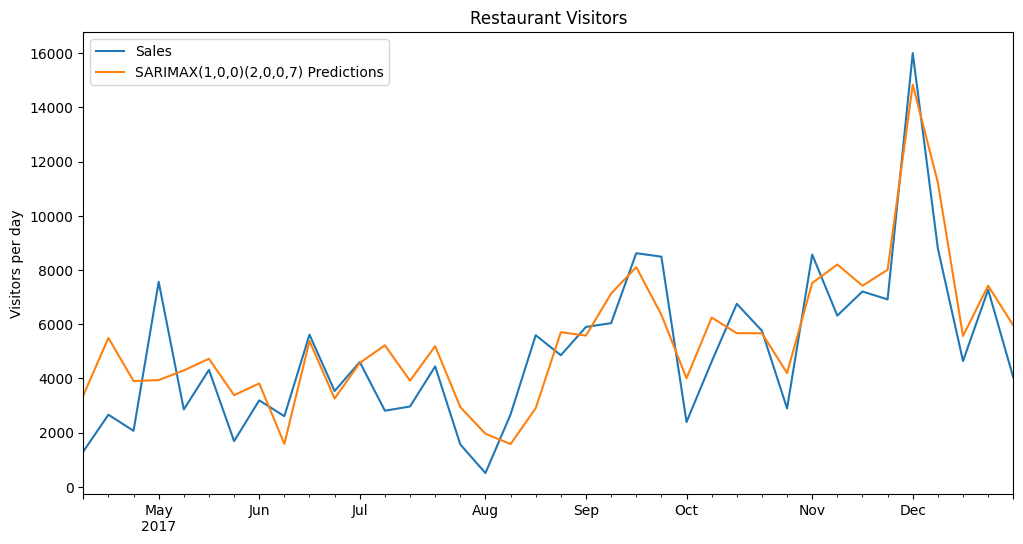

In [ ]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2:11.10}')
print()

error1x = mse(test['Sales'], predictions)
error2x = rmse(test['Sales'], predictions)

# Print new SARIMAX values
print(f'SARIMAX(1,0,0)(2,0,0,7) MSE Error: {error1x:11.10}')
print(f'SARIMAX(1,0,0)(2,0,0,7) RMSE Error: {error2x:11.10}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 12077452.14
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 3475.262887

SARIMAX(1,0,0)(2,0,0,7) MSE Error:   2317778.5
SARIMAX(1,0,0)(2,0,0,7) RMSE Error: 1522.425203


In [ ]:
model = SARIMAX(df['Sales'],exog=df['Quantity'],order=(1,2,1),seasonal_order=(1,2,2,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = df[169:][['Quantity']]
fcast = results.predict(len(df),len(df)+38,exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Forecast')

[Text(0.5, 0, ''), Text(0, 0.5, 'Visitors per day')]

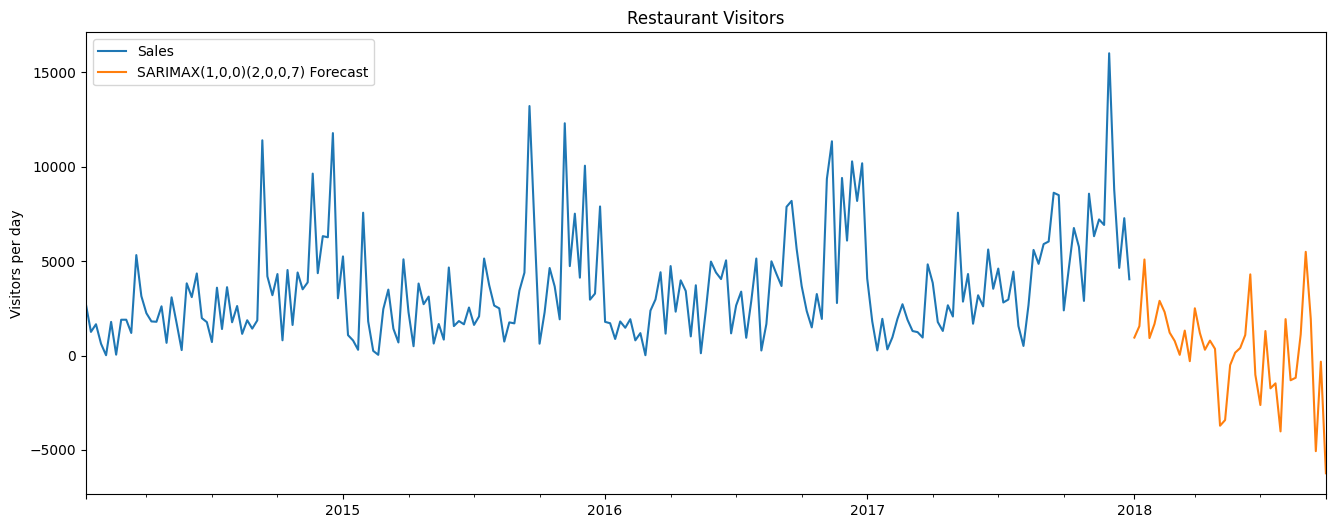

In [ ]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = df['Sales'].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
df = pd.read_csv('Alcohol_Sales.csv',index_col=0,parse_dates=True)
len(df)

325

In [ ]:
df.dropna(inplace=True)
len(df)

325

In [ ]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


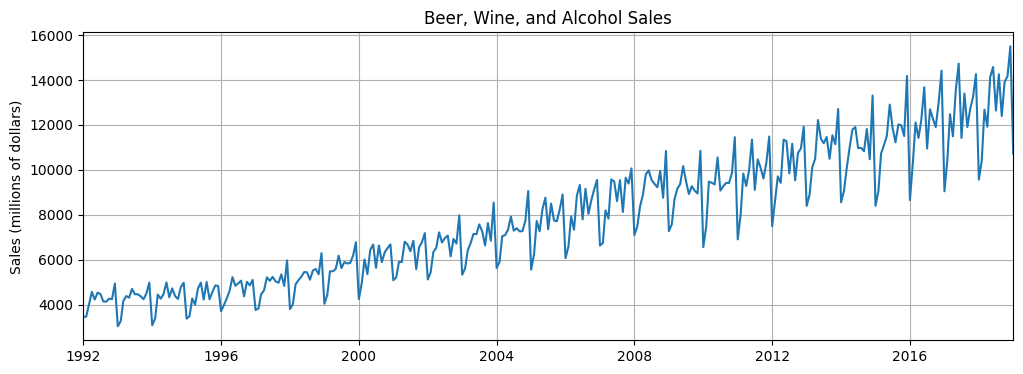

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.show()

In [ ]:
y = df['S4248SM144NCEN'].values.astype(float)

# Define a test size
test_size = 12

# Create train and test sets
train_set = y[:-test_size]
test_set = y[-test_size:]

In [ ]:
print(f"shape of train_set : {train_set.shape}")
print(f"shape of test_set : {test_set.shape}")

shape of train_set : (313,)
shape of test_set : (12,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate a scaler with a feature range from -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

In [ ]:
train_norm[:10]

array([[-0.92683135],
       [-0.92700231],
       [-0.83400291],
       [-0.73792632],
       [-0.79656381],
       [-0.74390974],
       [-0.75467989],
       [-0.81092401],
       [-0.81280451],
       [-0.79006753]])

In [ ]:
import torch
train_norm = torch.FloatTensor(train_norm).view(-1)

# Define a window size
window_size = 12

# Define function to create seq/label tuples
def input_data(seq, ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

# Apply the input_data function to train_norm
train_data = input_data(train_norm,window_size)
len(train_data)

301

In [ ]:
train_data[:2]

[(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
          -0.8128, -0.7901, -0.7933, -0.6743]),
  tensor([-1.])),
 (tensor([-0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128,
          -0.7901, -0.7933, -0.6743, -1.0000]),
  tensor([-0.9607]))]

In [ ]:
import torch.nn as nn
class SalesPredictor(nn.Module):

    def __init__(self, input_size=1, hidden_size=100, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        self.hidden = (torch.zeros(1, 1, self.hidden_size),
                       torch.zeros(1, 1, self.hidden_size))
    def forward(self, seq):
        out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(out.view(len(seq), -1))
        return pred[-1]

In [ ]:
predictorModel = SalesPredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(predictorModel.parameters(), lr=0.001)

predictorModel

SalesPredictor(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):

    # extract the sequence & label from the training data
    for seq, y_train in train_data:

        # reset the parameters and hidden states
        optimizer.zero_grad()
        predictorModel.hidden = (torch.zeros(1,1,predictorModel.hidden_size),
                        torch.zeros(1,1,predictorModel.hidden_size))

        y_pred = predictorModel(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.31344193
Epoch:  2 Loss: 0.33167127
Epoch:  3 Loss: 0.34990087
Epoch:  4 Loss: 0.29391649
Epoch:  5 Loss: 0.29854241
Epoch:  6 Loss: 0.29791811
Epoch:  7 Loss: 0.29305977
Epoch:  8 Loss: 0.27981097
Epoch:  9 Loss: 0.29554725
Epoch: 10 Loss: 0.28135669
Epoch: 11 Loss: 0.27556697
Epoch: 12 Loss: 0.26721761
Epoch: 13 Loss: 0.27093327
Epoch: 14 Loss: 0.26097298
Epoch: 15 Loss: 0.25313407
Epoch: 16 Loss: 0.25881463
Epoch: 17 Loss: 0.26831418
Epoch: 18 Loss: 0.26790729
Epoch: 19 Loss: 0.26956317
Epoch: 20 Loss: 0.26817960
Epoch: 21 Loss: 0.26164982
Epoch: 22 Loss: 0.24518645
Epoch: 23 Loss: 0.22029100
Epoch: 24 Loss: 0.18269219
Epoch: 25 Loss: 0.17835075
Epoch: 26 Loss: 0.12782203
Epoch: 27 Loss: 0.06485919
Epoch: 28 Loss: 0.03072101
Epoch: 29 Loss: 0.02970568
Epoch: 30 Loss: 0.00345256
Epoch: 31 Loss: 0.00273254
Epoch: 32 Loss: 0.00189043
Epoch: 33 Loss: 0.00272406
Epoch: 34 Loss: 0.00581335
Epoch: 35 Loss: 0.00700851
Epoch: 36 Loss: 0.00773058
Epoch: 37 Loss: 0.00680038
E

In [ ]:
future = 12

# Add the last window of training values to the list of predictions
preds = train_norm[-window_size:].tolist()

# Set the model to evaluation mode
predictorModel.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        predictorModel.hidden = (torch.zeros(1,1,predictorModel.hidden_size),
                        torch.zeros(1,1,predictorModel.hidden_size))
        preds.append(predictorModel(seq).item())

In [ ]:
preds[window_size:]

[0.3241190016269684,
 0.5936717987060547,
 0.45665442943573,
 0.8549693822860718,
 1.0958678722381592,
 0.3727215528488159,
 0.7684258818626404,
 0.5741822123527527,
 0.6574732065200806,
 0.793271005153656,
 0.9469184875488281,
 0.07656946778297424]

In [ ]:
true_prediction = scaler.inverse_transform(np.array(preds[window_size:]).reshape(1, -1))
true_prediction = true_prediction.squeeze()

In [ ]:
df['S4248SM144NCEN'][-12:]

,S4248SM144NCEN
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [ ]:
x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')
x

array(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
       '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='datetime64[D]')

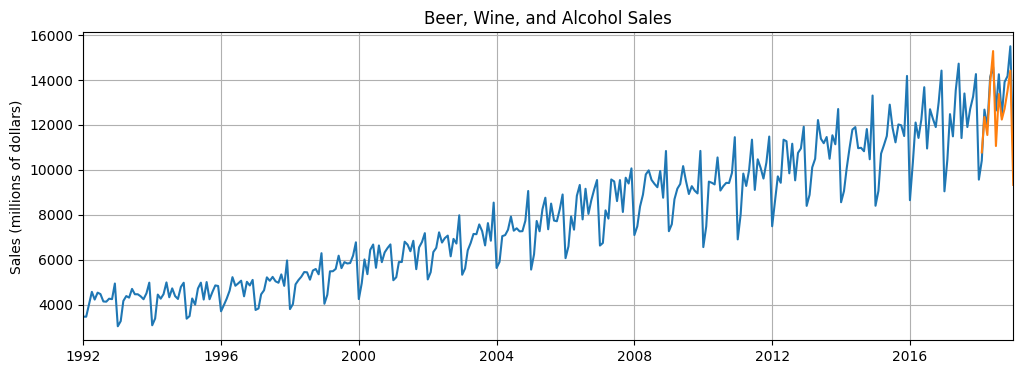

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_prediction)
plt.show()

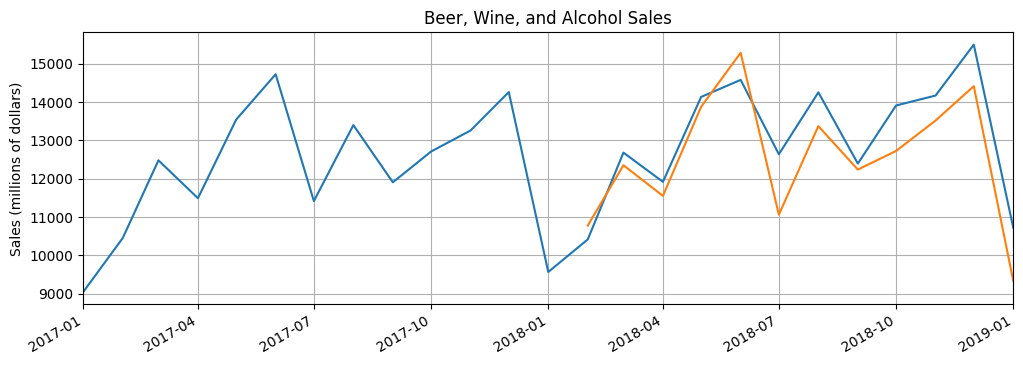

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

# Select the end of the graph with slice notation:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_prediction)
plt.show()


In [ ]:
train_norm

tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
        -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607, -0.8070, -0.7699,
        -0.7819, -0.7154, -0.7560, -0.7562, -0.7721, -0.7940, -0.7489, -0.6678,
        -0.9925, -0.9408, -0.7586, -0.7897, -0.7557, -0.6660, -0.7790, -0.7114,
        -0.7704, -0.7919, -0.7003, -0.6683, -0.9420, -0.9226, -0.7884, -0.8354,
        -0.7121, -0.6678, -0.7962, -0.6634, -0.7942, -0.7396, -0.6889, -0.6931,
        -0.8858, -0.8373, -0.7896, -0.7285, -0.6260, -0.6914, -0.6735, -0.6528,
        -0.7719, -0.6613, -0.6890, -0.6468, -0.8757, -0.8643, -0.7567, -0.7258,
        -0.6275, -0.6536, -0.6239, -0.6576, -0.6685, -0.6049, -0.6923, -0.4984,
        -0.8692, -0.8311, -0.6808, -0.6480, -0.6229, -0.5870, -0.5890, -0.6451,
        -0.5753, -0.5637, -0.6042, -0.4435, -0.8289, -0.7600, -0.5815, -0.5808,
        -0.5630, -0.4623, -0.5572, -0.5114, -0.5218, -0.5182, -0.4617, -0.3606,
        -0.7928, -0.6716, -0.4911, -0.60